In [82]:
#pip install wordcloud

In [83]:
import pandas as pd
import numpy as np
import codecs

import os
import ctypes

import re

import itertools

#import pandas
from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/opt/anaconda/envs/Python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  if __name__ == '__main__':


In [4]:
keyword_list = ["living lab",
                "innovation environment","innovation facility",
                "innovation hub","innovation centre","innovation centres","innovation space",
                "co-innovation hub","coinnovation hub","co-innovation centre",
                "coinnovation centre","co-innovation facility","co-innovation facilities","coinnovation facility","coinnovation facilities",
                "co-innovation space","coinnovation space","co-innovation environment",
                "coinnovation environment","co-innovation lab","coinnovation lab",
                "cocreation hub","co-creation hub","co-creation centre",
                "cocreation centre","co-creation facilities","co-creation facility","cocreation facilit",
                "co-creation space","cocreation space","co-creation environment",
                "cocreation environment","co-creation lab","cocreation lab",
                "co-creation hub","Open innovation","innovation lab",
                "cooperation lab","innovation hub","innovation labs",
                "test bed",'testbed','testbeds',
                "scale-up facilities",
                "scale up facility","scale-up environment","scale up environment",
                "scale-up space","scale-up centre","scale-up centres",
                "scaleup space","scale-up hub","scale up",
                "scale-up lab*","scale uplab","pilot demonstration",
                "pilot facility","pilot facilities","pilotfacility","pilotfacilities","pilot plant",
                "demonstration plant*","pilot space","pilotlab",
                "pilot environment","demonstration environment","demonstrat*facilit*",
                "pilot line","demonstration center",
               ]

additional_words = ["living lab","living labs","living laboratory","living laboratories",
                    'testbeds','testbed',
                    'pilot plant','pilot plants','pilot-plant','pilotfacility','pilotfacilities','pilotlab','pilotlabs','pilotlaboratory','pilotlaboratories',
                    'living labs',
                    'scale-up','scaleup','scale','uplab',
                    'Demonstration Plant','demonstrative environments', 'DEMONSTRATION CENTERS',
                    'innovation laboratory',
                    'innovation Laboratories','Innovation Hubs'
                   ]

false_postives = ['DEMONSTRATION CENTRE','PILOTED DEMONSTRATION','Pilot Demonstrator','demonstration plants',
                  'testbedding','pilot demonstrations']

keyword_list = keyword_list + additional_words + false_postives
keyword_list = [x.upper() for x in keyword_list]

In [5]:
#set file-path to 'DATA/'
file_path = 'DATA/'

#check for # of files and filenames
filenames = os.listdir(file_path)
len(filenames), filenames

(10,
 ['savedrecs-5.txt',
  'savedrecs-9.txt',
  'savedrecs-10.txt',
  'savedrecs-7.txt',
  'savedrecs-3.txt',
  'savedrecs.txt',
  'savedrecs-6.txt',
  'savedrecs-2.txt',
  'savedrecs-8.txt',
  'savedrecs-4.txt'])

In [6]:
#generate 'empty' dataframe -> to only filter column names
filename =  file_path + filenames[0]
doc = codecs.open(filename,'rU','UTF-8')
df_col = pd.read_csv(doc, sep='\t')

#reset variables
res = []
df_add = []

#set base dataframe only including column names
df_base = pd.DataFrame(columns=df_col.columns)


for file in filenames:
    path = file_path+file
    doc = codecs.open(path,'rU','UTF-8')
    
    df_add = pd.read_csv(doc, sep='\t')
    #res = df_base.append(df_add)
    df_base = df_base.append(df_add)

df = df_base
df.shape

(4722, 67)

In [7]:
df.columns
#CA = 'Title'

Index(['PT', 'AU', 'BA', 'BE', 'GP', 'AF', 'BF', 'CA', 'TI', 'SO', 'SE', 'BS', 'LA', 'DT', 'CT', 'CY', 'CL', 'SP', 'HO', 'DE', 'ID', 'AB', 'C1', 'RP', 'EM', 'RI', 'OI', 'FU', 'FX', 'CR', 'NR', 'TC', 'Z9', 'U1', 'U2', 'PU', 'PI', 'PA', 'SN', 'EI', 'BN', 'J9', 'JI', 'PD', 'PY', 'VL', 'IS', 'PN', 'SU', 'SI', 'MA', 'BP', 'EP', 'AR', 'DI', 'D2', 'EA', 'PG', 'WC', 'SC', 'GA', 'UT', 'PM', 'OA', 'HC', 'HP', 'DA'], dtype='object')

In [8]:
df.shape

(4722, 67)

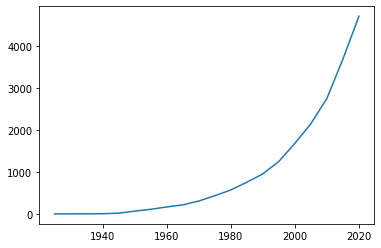

In [9]:
# number of paper at given time
year_markers = range(1925, 2021, 5)
values = []
for i in year_markers:
    values.append(df.PD[df['PD']<=i].count())
    #print(i, df.PD[df['PD']<=i].count())
    
plt.plot(year_markers,values)

In [10]:
numbers2000 = numbers
#numbers2000

NameError: name 'numbers' is not defined

In [ ]:
numbers2005 = numbers
#numbers2005

In [ ]:
numbers2010 = numbers
#numbers2010

In [ ]:
numbers2015 = numbers
#numbers2015

In [ ]:
numbers2020 = numbers
#numbers2020

In [ ]:
#df_merge_col = pd.merge(numbers2000, numbers2020,on=numbers2000.index,how = 'inner', suffixes=('1_','2_'))
#df_merge_col
mergedDf = numbers2020.merge(numbers2015, left_index=True, right_index=True,how='outer')
mergedDf = mergedDf.merge(numbers2010, left_index=True, right_index=True,how='outer')
mergedDf = mergedDf.merge(numbers2005, left_index=True, right_index=True,how='outer')
mergedDf = mergedDf.merge(numbers2000, left_index=True, right_index=True,how='outer')

mergedDf = mergedDf.fillna(0).astype(int)
mergedDf.columns=['2020','2015','2010','2005','2000']
mergedDf = mergedDf.sort_values('2020', ascending=False)

#mergedDf.to_excel("keyword_per_year.xlsx",sheet_name='keyword_count')
mergedDf

In [13]:
max_year = 2020
#######################################################
df_search = df[df['PD']<=max_year]
a=[] 
for index, row in df_search[['CA']].iterrows():
    #print(row.T)
    a.append(row.T)
len(a)

4712

### Blacklist

In [52]:
blacklist_list = ['Living laboratory animals',
                  'Innovation labour',
                  'Labor',
                  'Labour',
                  #'pilot demonstrations',
                  'demonstrating environmental', #Demonstrating Environmental Sustainability
                  'DEMONSTRATE ENVIRONMENT-SPECIFIC',
                  #'pilot plantat', #typo
                  ]

#Proposed Framework for Evaluating Quality of Experience in a Mobile, Testbed-oriented Living Lab Setting
#Organizing information integration in agri-food-A method based on a service-oriented architecture and living lab approach

blacklist_list = [x.upper() for x in blacklist_list]

In [53]:
#universal function match for two-word string 

def _match_func(lst, match_list):
    for item_lst in lst:
        words = item_lst.replace('.','')\
        .replace('-',' ').replace(':','')\
        .replace(',','').replace('(','')\
        .replace(')','').replace('"','')\
        .replace('@',' ').replace('?','')\
        .replace("'",'').split()
        
        res = pd.DataFrame(itertools.combinations(words, 2), columns=['First', 'Second'])
        res["TWO_WORD"] = res["First"] + ' ' + res["Second"]
        intermediate = res["TWO_WORD"].tolist()
        words = intermediate +  words
        
        match_list2 = list([])
        
        for word in words:
            word = word.upper()  
            if word in match_list:
                match = word 
                match_list2.append(match)      
        lst = match_list2
    return lst

In [54]:
new_blacklist = list([])

for lst in a:
    lst = list(lst)
    row = _match_func(lst, blacklist_list)
    #print(row)
    new_blacklist.append(row)
new_blacklist = pd.DataFrame(new_blacklist)

new_blacklist['BLACKLIST'] = 0
new_blacklist['BLACKLIST'] = new_blacklist[new_blacklist.columns[0:]].apply(lambda x: ', '.join(x.dropna().astype(str)),axis=1)
new_blacklist = new_blacklist['BLACKLIST']

new_blacklist[new_blacklist != '0'] = 1

#print(new_blacklist.head(10)), print(df['CA'].head(10))

In [55]:
#output = pd.DataFrame(new_blacklist).reset_index().drop('index', axis=1)
#output = output.fillna('na')
#print(output)

c = (new_blacklist == 1).sum()
print(c/len(new_blacklist)*100) #percent of false positves

0.4032258064516129


### Keyword Match

In [56]:
new_a = list([])

for lst in a:
    lst = list(lst)
    row = _match_func(lst, keyword_list)
    #print(row)
    new_a.append(row)
new_a = pd.DataFrame(new_a)

new_a['MATCH_KEYWORD'] = new_a[new_a.columns[0:]].apply(lambda x: ', '.join(x.dropna().astype(str)),axis=1)
df_final = pd.concat([new_blacklist.reset_index(drop=True),new_a['MATCH_KEYWORD'].reset_index(drop=True),df.reset_index(drop=True)], axis= 1) 

In [57]:
df_final.shape

(4722, 69)

In [59]:
### export as excel file ###
df_final.to_excel("with_FLASEPOSITIVES.xlsx",sheet_name='FLASE POSITIVES')

In [35]:
### manual analysis ###

#keyword_title_df[500:1000]
#keyword_title_df[keyword_title_df['COMBINED'] == 'PILOT PLANT, SCALE'].shape

In [36]:
### not necessary ###

output = pd.DataFrame(new_a).reset_index().drop('index', axis=1)
output = output.fillna('na')
#print(output)

c = (output[0] != 'na').sum()
print(c/len(output[0])*100)
#print(c), print(keywords)

### not necessary ###

99.5118845500849


In [37]:
#list in list tu flat list transformieren
new_a = new_a[[0,1,2]].values.tolist()
new_a
flat_list = [item for sublist in new_a for item in sublist]

#flat_list = [x for xs in new_a for x in xs.split(',')]

#dataframe zusammenbauen
keywords = pd.DataFrame(flat_list).reset_index().drop('index', axis=1)
#keywords = keywords.rename(columns={"CA": "KEYWORDS"})
print(keywords.shape)
#keywords

#OUTPUT generieren
keywords['count'] = 0
numbers = keywords.groupby(0).count()
numbers = numbers.sort_values(['count'], ascending=False)
#print(numbers)
#numbers = numbers
numbers

(14136, 1)


,count
0,
PILOT PLANT,2519
TESTBED,1003
TEST BED,503
SCALE,389
PILOT PLANTS,150
LIVING LAB,118
TESTBEDS,115
DEMONSTRATION PLANT,109
LIVING LABS,94


In [38]:
breaker

NameError: name 'breaker' is not defined

In [ ]:
### WORDCLOUD ###

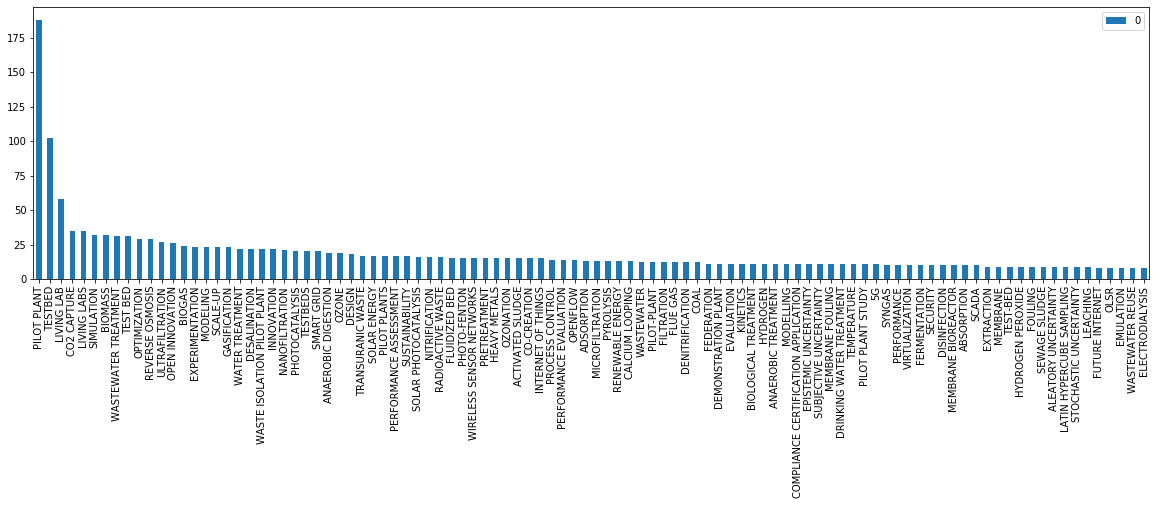

In [74]:
#rename df for ease
df_wordfreq = df

ho_list = df_wordfreq["HO"].str.split(";", expand = False) 
#new['COMBINE'] = new[new.columns[1:]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
df_wordfreq['HO_LIST']= ho_list
#df_wordcloud['HO_LIST']

#flatten list and strip individual strings
df_wordfreq = df_wordfreq['HO_LIST'].dropna().explode()
df_wordfreq = list(df_wordfreq)
map(str.strip, df_wordfreq)
#df_wordcloud

#word counter
counts = dict(Counter(df_wordfreq))

upper_count = Counter()
for k,v in counts.items():
    upper_count.update({k.upper().strip(): v})
counts = upper_count

#sorted top100 frequent words
counts = dict(sorted(counts.items(), key = lambda x : x[1], reverse=True)[:100])

#plot word cloud
plt = pd.DataFrame.from_dict(counts, orient='index')
plt.plot(kind='bar',figsize=(20,5))

In [ ]:
### WORDCLOUD ###

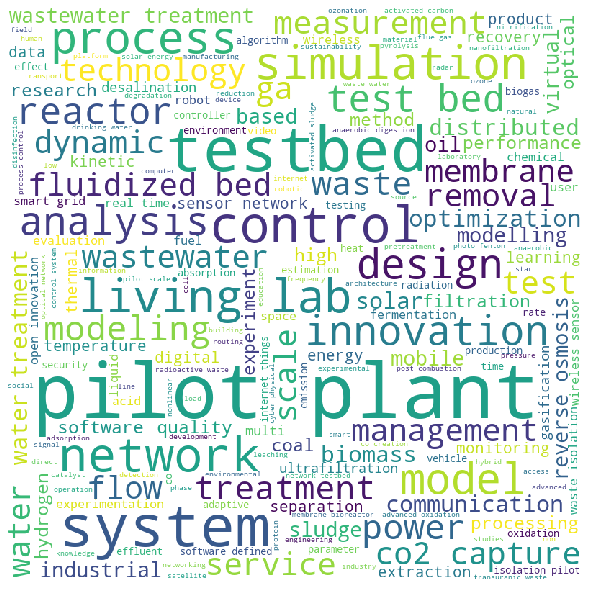

In [85]:
#rename dataframe for ease
df_wordcloud = df

#code found online; fixed code for wordcloud
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_wordfreq: 
    # typecaste each val to string 
    val = str(val) 
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [ ]:
breaker

In [ ]:
### not necessary ####

df_keyword = df['HO'].str.split(';', 1000, expand=True)
print(df_keyword.shape)

#transform reference dataframe to list
a = df_keyword.values.tolist()

for lst in a:
    for ind, item in enumerate(lst):
        lst[ind] = str(lst[ind]).upper()
        lst[ind] = lst[ind].split(';')[0]
        #lst[ind] = ''.join([i for i in lst[ind] if not i.isdigit()])
        #lst[ind] = ''.join(e for e in lst[ind] if e.isalnum())
        lst[ind] = re.sub(r'[^a-zA-Z ]',r'',lst[ind])
        lst[ind] = lst[ind].strip()
        
        if lst[ind] == 'NONE':
            lst[ind] = 'na'
        if lst[ind] == 'NAN':
            lst[ind] = 'na'

#transform list to dataframe
df_keyword = pd.DataFrame(a)

#output reference id dataframe
#df_keyword.head(20)

a = df_keyword.values.tolist()

for lst in a:
    for ind, item in enumerate(lst):
        word = lst[ind]
        lst[ind] = np.nan
        if word in keyword_list:
            match = word
            #print(match)
            lst[ind] = match            

key = pd.DataFrame(a).reset_index().drop('index', axis=1)
print(key.shape)
key['COMBINED'] =  key.values.tolist()
key = key['COMBINED']

#key

### not necessary ####

In [ ]:
breaker

In [ ]:

LIVING, COST OF LIVING (FP), - COST OF LIVING, LABOR-MARKET OPPORTUNITIES, AND MIGRATION DECISION - CASE OF MISSPECIFICATION
LIVING LABOR (fp, 3x)
DEMONSTRATION CENTERS (fP, 3x), e.g., CHARACTERISTICS OF CHILDREN LABELED AND SERVED AS LEARNING-DISABLED IN SCHOOL SYSTEMS AFFILIATED WITH CHILD SERVICE DEMONSTRATION CENTERS


###

DEMONSTRATION CENTRE
PILOTED DEMONSTRATION (FP)
Pilot Demonstrator 

demonstration plants (FP)
testbedding (FP)
pilot demonstrations (?)

innovation Laboratories (TRUE)
#
pilot plantat (typo in title, FP)

Industrial Innovation, Labour Productivity, Sales and Employment (FP)
innovation labour (FP)

Innovation Hubs (TRUE)

Disruptive innovation, labor markets, (FP)

demonstrating environmental (TRUE)

DO THE BIVALVIA DEMONSTRATE ENVIRONMENT-SPECIFIC SEXUAL STRATEGIES (FP)

#LABOR -> FP

Demonstrating Environmental (FP)
#-> ENVIRONMENT, note

In [ ]:
#pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

fuzz.ratio('testbed', 'test beds')

In [ ]:
################################################################################################
# False Positives
################################################################################################

In [ ]:
# add temporal dimension


LIVING, COST OF LIVING (FP), - COST OF LIVING, LABOR-MARKET OPPORTUNITIES, AND MIGRATION DECISION - CASE OF MISSPECIFICATION
LIVING LABOR (fp, 3x)
DEMONSTRATION CENTERS (fP, 3x), e.g., CHARACTERISTICS OF CHILDREN LABELED AND SERVED AS LEARNING-DISABLED IN SCHOOL SYSTEMS AFFILIATED WITH CHILD SERVICE DEMONSTRATION CENTERS


###

DEMONSTRATION CENTRE
PILOTED DEMONSTRATION (FP)
Pilot Demonstrator 

demonstration plants (FP)
testbedding (FP)
pilot demonstrations (?)

innovation Laboratories (TRUE)
#
pilot plantat (typo in title, FP)

Industrial Innovation, Labour Productivity, Sales and Employment (FP)
innovation labour (FP)

demonstrating environmental (TRUE)

DO THE BIVALVIA DEMONSTRATE ENVIRONMENT-SPECIFIC SEXUAL STRATEGIES (FP)

#LABOR -> FP

Demonstrating Environmental (FP)
#-> ENVIRONMENT, note

In [ ]:
#function for TWO WORDS (& single word)

def keyword_match_func(lst):
    for item_lst in lst:
        words = item_lst.replace('.','')\
        .replace('-',' ').replace(':','')\
        .replace(',','').replace('(','')\
        .replace(')','').replace('"','')\
        .replace('@',' ').replace('?','')\
        .replace("'",'').split()
                
        res = pd.DataFrame(itertools.combinations(words, 2), columns=['First', 'Second'])
        res["TWO_WORD"] = res["First"] + ' ' + res["Second"]
        intermediate = res["TWO_WORD"].tolist()
        words = intermediate +  words
        
        match_list = list([])
        for word in words:
            word = word.upper()  
            if word in keyword_list:
                match = word 
                match_list.append(match)      
        lst = match_list
    return lst